# Описание проекта
Предлагается набор данных, содержащий  переменные, характеризующие клиента, кредитную историю клиена, кредит по которому нужно сделать прогноз

## Описание данных
data.csv - файл, содержащий искусственно сгенерированные данные о клиентах банка.

## Результат решения кейса:
Целевая  переменная:
expert - решение, которое принято по заявке (0 - одобрено, 1 - отклонено)
Необходимо на основе предоставленных данных построить модель для предсказания
целевой переменной.
Обосновать выбранные метрики качества. Подробно описать способ оценки качества
построенной модели

In [1]:
import pandas as pd
import numpy as np

# Display up to 20 columns of a dataframe
pd.set_option('display.max_columns', 20)


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#read the data
data = pd. read_csv('./data.csv', sep =';')

# display top of df
data.head(20)

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1
5,786916.00,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
6,786916.00,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
7,786916.00,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
8,786916.00,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
9,0.00,0,21143.00,21143.00,1016,10924.00,28,1,0,10000.0,10000,90,0.0,2017-07-23,0.0,728454,123851,1


In [2]:
#check the shape of df
data.shape

(50001, 18)

In [3]:
# check the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   closed_cred_sum          50001 non-null  float64
 1   closed_creds             50001 non-null  int64  
 2   active_cred_sum_overdue  50001 non-null  float64
 3   active_cred_sum          50001 non-null  float64
 4   active_cred_day_overdue  50001 non-null  int64  
 5   active_cred_max_overdue  50001 non-null  float64
 6   age                      50001 non-null  int64  
 7   gender                   50001 non-null  int64  
 8   region                   50001 non-null  int64  
 9   first_loan               49982 non-null  float64
 10  loan_cost_all            50001 non-null  int64  
 11  first_days_quant         50001 non-null  int64  
 12  month_income             50001 non-null  float64
 13  order_date               50001 non-null  object 
 14  cost_all              

In [4]:
# check column cost_all to find dependancy which
#is able to degrade prediction of our model by overfitting
df = data[['cost_all', 'expert']]
df[df.expert ==1].head()

,cost_all,expert
0,0.0,1
1,0.0,1
2,0.0,1
3,0.0,1
4,0.0,1


In [5]:
#drop undescriptive columns
data.drop(columns =['order_date', 'order_id', 'client_id', 'cost_all'], axis = 1, inplace = True)

In [6]:
# Select columns and convert the data type to float
for col in list(data.columns):
    if ('closed_creds' in col or 'active_cred_day_overdue' in col or 'age' in col or 'gender' in 
        col or 'region' in col or 'loan_cost_all' in col or 'first_days_quant' in col or 'expert' in col):
        data[col] = data[col].astype(float)


In [7]:
# Function to calculate missing values by column
def missing_values_table(data):
        mis_val = data.isnull().sum()
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(data)

Your selected dataframe has 14 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
first_loan,19,0.0


In [9]:
# drop missing values
data = data.dropna(axis = 0)

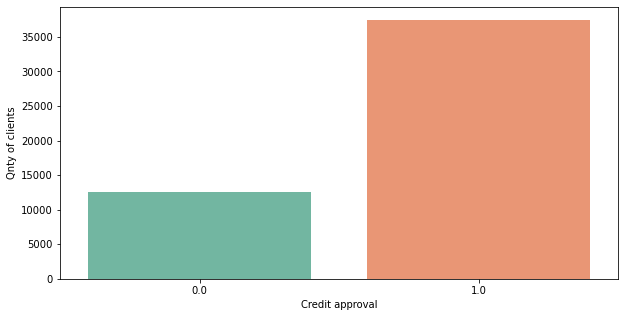

In [10]:
# check how many client got a credit and make a plot
import matplotlib.pyplot as plt

ax = sns.countplot(x = data.expert, palette="Set2")
ax.set_xlabel('Credit approval')
ax.set_ylabel('Qnty of clients')
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

In [11]:
# check the percentage of granted credit
n=len(data)
credit_granted=len(data[data['expert']==0])
credit_declined=len(data[data['expert']==1])

print("Credit granted: {:.3f}".format(credit_granted*100/n))
print("Credit declined:{:.3f}".format(credit_declined*100/n))

Credit granted: 25.071
Credit declined:74.929


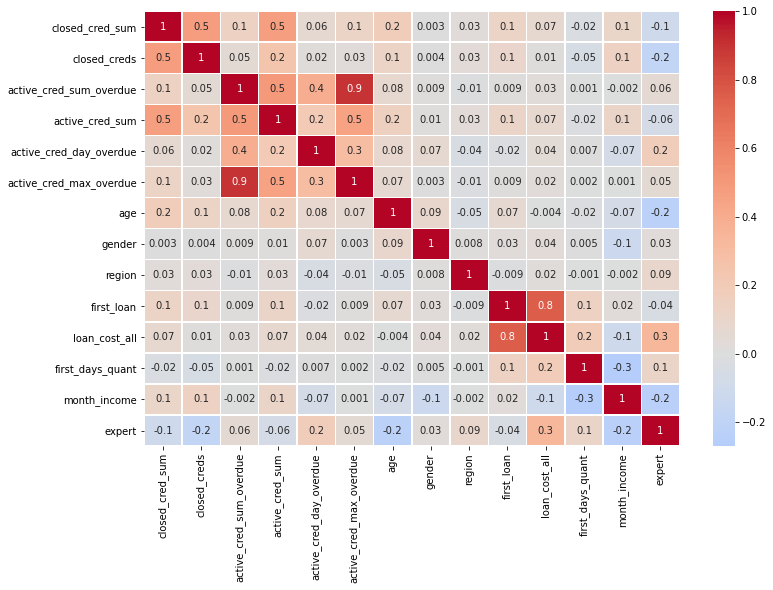

In [12]:
# built correlation matrix

from matplotlib import pyplot
corr = data.corr()
fig, ax = pyplot.subplots(figsize=(12,8))
graph = sns.heatmap(corr, annot = True, fmt='.1g', linewidths=.5, cmap="coolwarm", center = 0)

Text(31.955486111111114, 0.5, 'loan_cost_all')

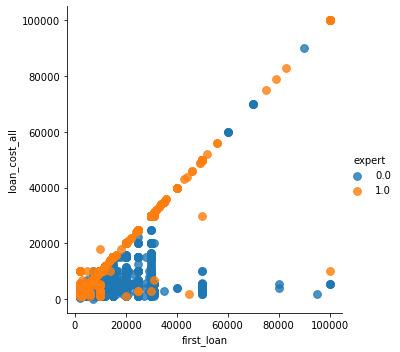

In [13]:
# we can see here 2 feature couple are strongly collinear (coeffs = 0.9 and 0.8).
# Planning to drop them not to overengineer model.
# But firstly collinear.

sns.lmplot('first_loan', 'loan_cost_all', 
          hue = 'expert', data = data,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,);


plt.xlabel("first_loan")
plt.ylabel('loan_cost_all')

Text(28.741597222222232, 0.5, 'loan_cost_all')

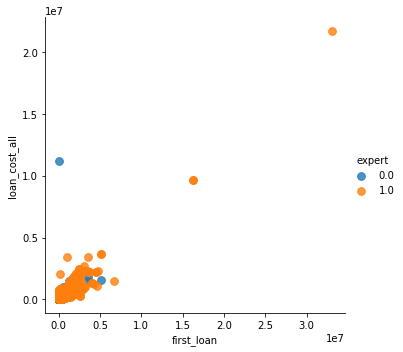

In [14]:
sns.lmplot('active_cred_sum_overdue', 'active_cred_max_overdue', 
          hue = 'expert', data = data,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,);


plt.xlabel("first_loan")
plt.ylabel('loan_cost_all')

In [15]:
# make a feature engineering - a column showing ratio of fist_loan vs loan_cost_all
data['ratio'] = data['first_loan'] /data['loan_cost_all']


In [16]:
# drop one feature from each collinear couples
data = data.drop(columns=['active_cred_max_overdue','loan_cost_all']) #first_loan

In [17]:
#check 4 features having possitive and negative correlation with target
corr = data.corr()
print(corr['expert'].sort_values().head(4))
print(corr['expert'].sort_values().tail(4))

ratio          -0.458727
month_income   -0.239989
age            -0.226935
closed_creds   -0.176348
Name: expert, dtype: float64
region                     0.090475
first_days_quant           0.112079
active_cred_day_overdue    0.176303
expert                     1.000000
Name: expert, dtype: float64


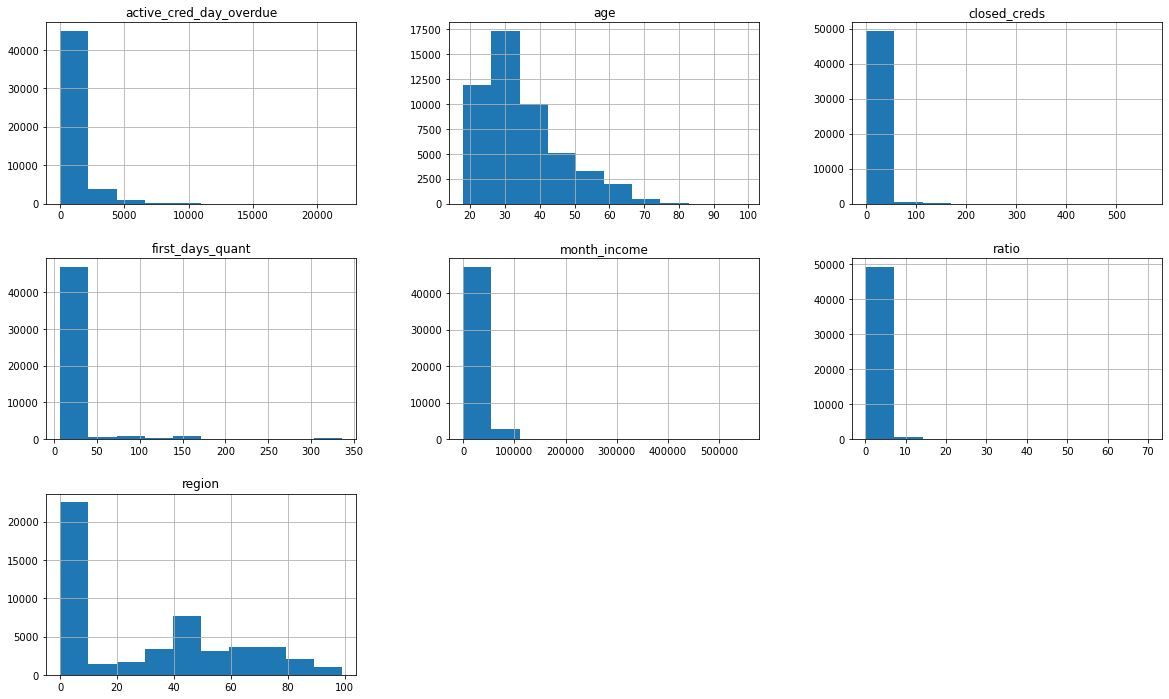

In [18]:
#look at hist of those features
features = list(set(data.columns) - set(['closed_cred_sum','first_loan','active_cred_sum_overdue','active_cred_sum','gender','expert']))
data[features].hist(figsize = (20,12));

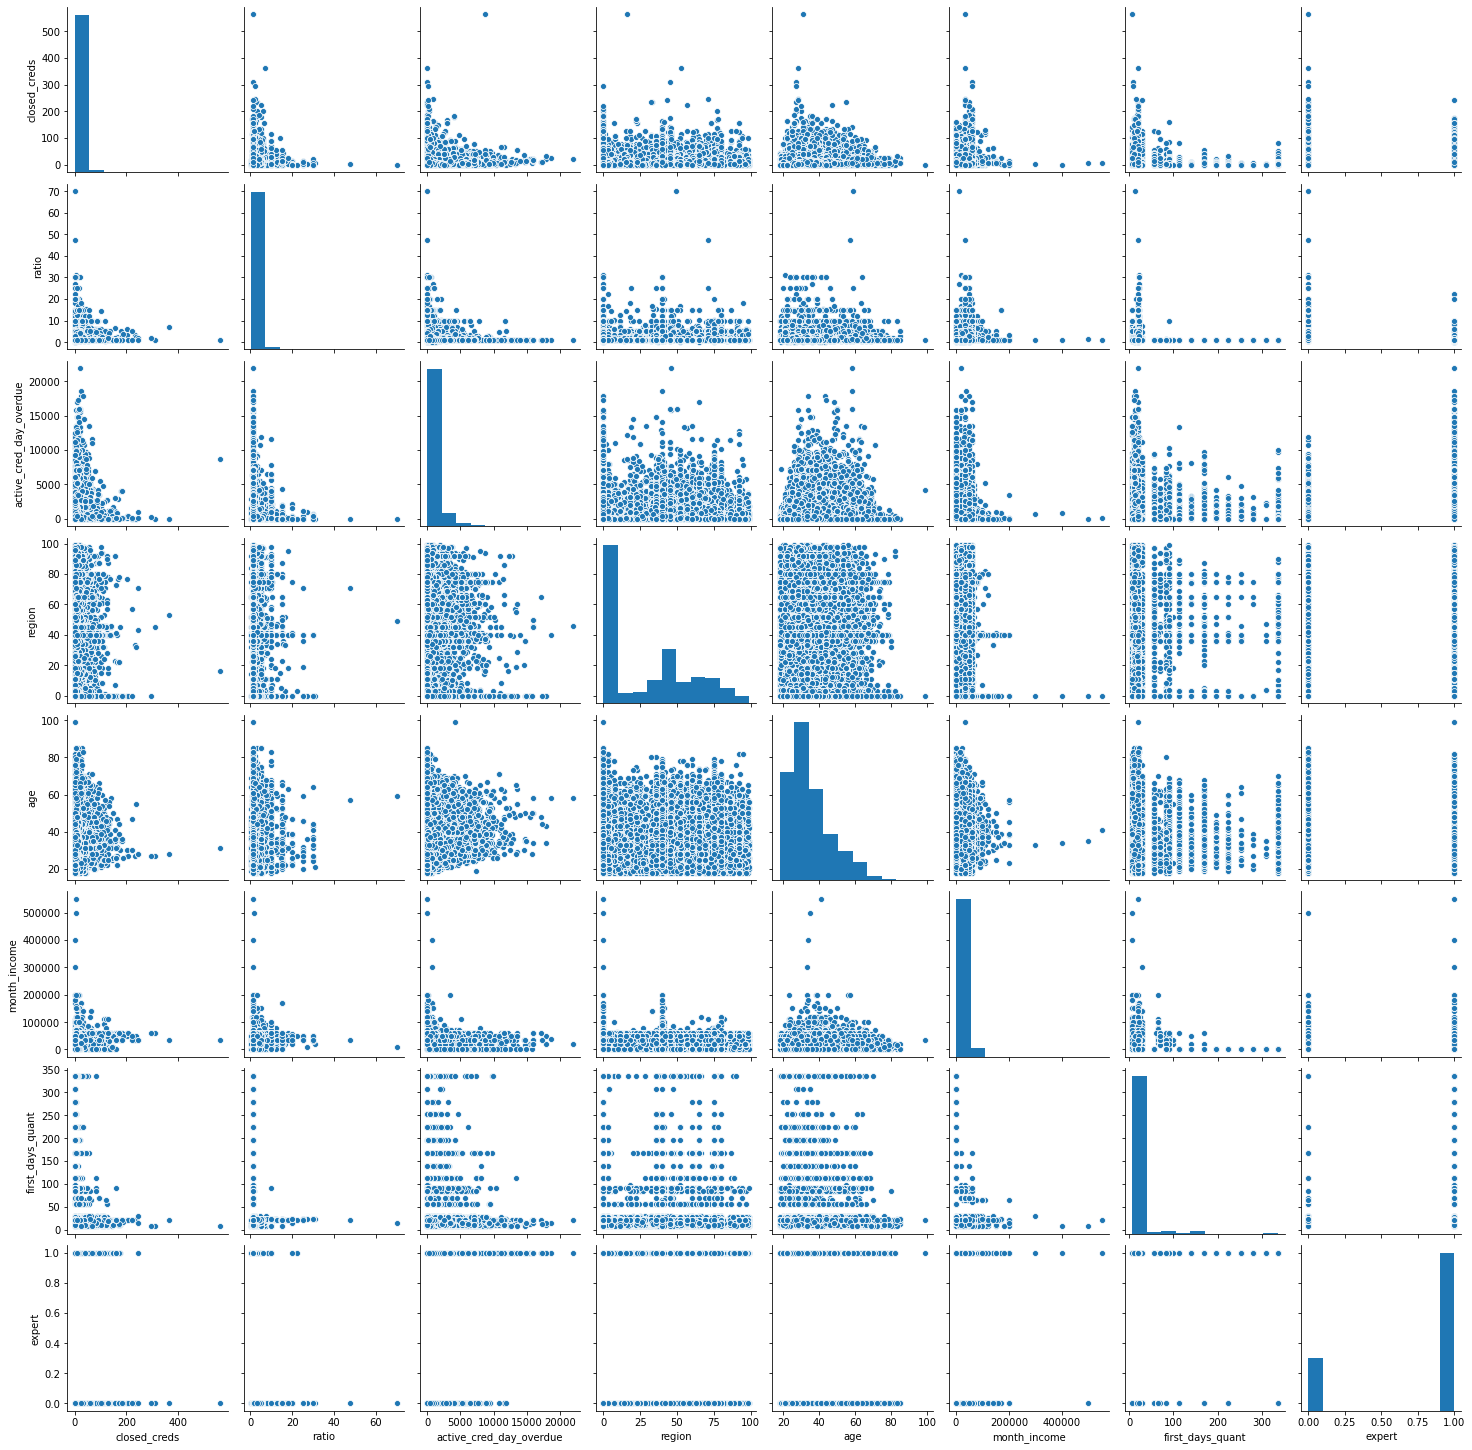

In [19]:
#look at graph of dependency feature-target
g = sns.pairplot(data[features+['expert']]);

In [20]:
# active_cred_day_overdue analysis
data.active_cred_day_overdue.describe()

count    49982.000000
mean       722.429735
std       1371.564836
min          0.000000
25%          0.000000
50%         64.000000
75%        923.000000
max      21927.000000
Name: active_cred_day_overdue, dtype: float64

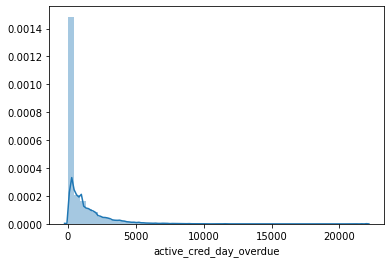

In [21]:
g = sns.distplot(data.active_cred_day_overdue)

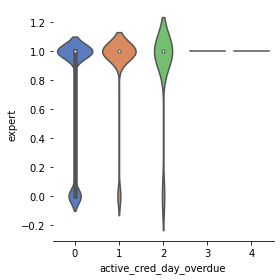

In [22]:
data.active_cred_day_overdue = pd.cut(data.active_cred_day_overdue.values, 5).codes
g  = sns.catplot(x="active_cred_day_overdue",y="expert",data=data, kind ='violin',height = 4, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("expert")

In [23]:
# first_days_quant analysis
data.first_days_quant.describe()

count    49982.000000
mean        23.956484
std         36.676875
min          7.000000
25%         10.000000
50%         20.000000
75%         20.000000
max        336.000000
Name: first_days_quant, dtype: float64

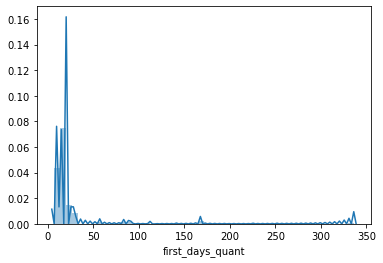

In [24]:
g = sns.distplot(data.first_days_quant)

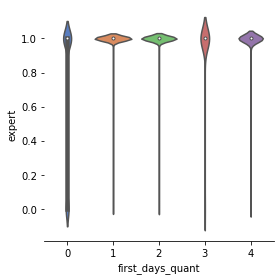

In [25]:
data.first_days_quant = pd.cut(data.first_days_quant.values, 5).codes
g  = sns.catplot(x="first_days_quant",y="expert",data=data, kind='violin', height = 4, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("expert")

In [26]:
# age analysis
data.age.describe()

count    49982.000000
mean        35.020587
std         11.234474
min         18.000000
25%         27.000000
50%         32.000000
75%         41.000000
max         99.000000
Name: age, dtype: float64

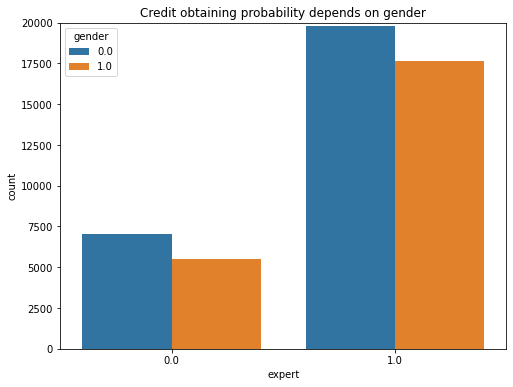

In [27]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='expert', data=data, hue='gender')
ax.set_ylim(0,20000)
plt.title("Credit obtaining probability depends on gender")
plt.show()

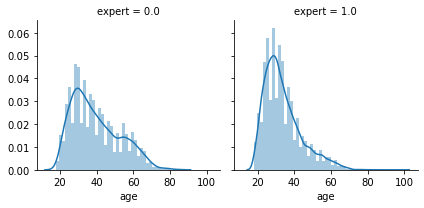

In [28]:
g = sns.FacetGrid(data, col='expert')
g = g.map(sns.distplot, "age")

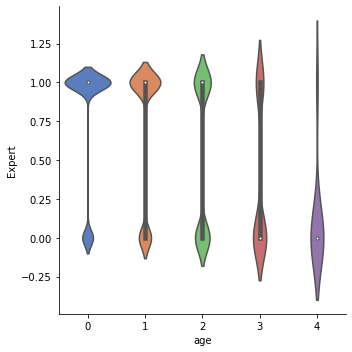

In [29]:
data.age = pd.cut(data.age.values, 5).codes
g  = sns.catplot(x="age",y="expert",data=data, kind="violin",  height=5, palette = "muted")
g = g.set_ylabels("Expert")

In [30]:
# month_income alaysis
data.month_income.describe()

count     49982.000000
mean      24939.579759
std       20653.701067
min           0.000000
25%           0.000000
50%       25000.000000
75%       35000.000000
max      550000.000000
Name: month_income, dtype: float64

In [31]:
data.month_income.value_counts()

0.0         15172
35000.0     12146
50000.0      7296
20000.0      5088
60000.0      2414
            ...  
101000.0        1
16100.0         1
19900.0         1
9924.0          1
11262.0         1
Name: month_income, Length: 247, dtype: int64

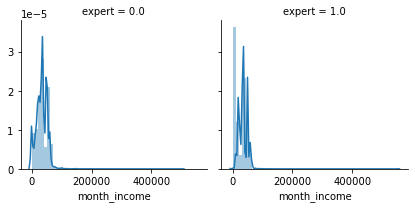

In [32]:
g = sns.FacetGrid(data, col='expert')
g = g.map(sns.distplot, "month_income")

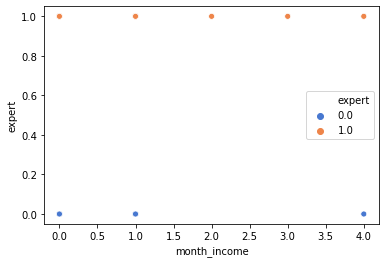

In [33]:
data.month_income = pd.cut(data.month_income.values, 5).codes
sns.scatterplot(x = "month_income",y = 'expert', hue="expert", palette = "muted",data=data)

In [34]:
data.closed_creds.describe()

count    49982.000000
mean         7.970669
std         13.919431
min          0.000000
25%          1.000000
50%          4.000000
75%          9.000000
max        563.000000
Name: closed_creds, dtype: float64

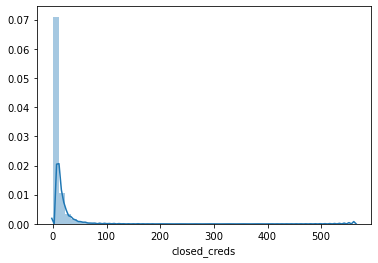

In [35]:
g = sns.distplot(data.closed_creds)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
# make a prediction, check confusion matrix - i.e TPR,TNR,FPR, FNR
# and then find out accuracy and f-1 score.
#𝐴𝐶𝐶 (Accuracy) - share of correctly classified examples among all examples.
#The main characteristic of the quality of the classification.

#𝐹1 (F1-measure) - harmonic mean of accuracy and completeness.
#Allows you to take into account both characteristics at the same time.

# to evaluate models use ROC AUC(area under curve)
# ROC is quality graph of binary classifier showing the dependence of TPR on FPR when the decision rule threshold is varied.
# ROC AUC score is a quantitative characteristic of classification qualit.
# It measures how well predictions are ranked, rather than their absolute values.
# The higher the AUC value, the "better" the classification model.


# make a function to calculate accuraccy and f1 score as model metrics
def print_logisitc_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'acc = {acc:.2f} F1-score = {f1:.2f}')

# make function to arrange plot roc auc
def calc_and_plot_roc(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

In [37]:
# split data for train & test 
y = data['expert']
X = data.drop(columns='expert')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [38]:
# normalise data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
#make a model LR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

model = LogisticRegression(n_jobs=-1, random_state = 42).fit(X_train, y_train)
y_pred = model.predict(X_test)
print_logisitc_metrics(y_test, y_pred)


# check confussion matrix 
M = confusion_matrix(y_test, y_pred)
print(M) 

acc = 0.92 F1-score = 0.95
[[2216  961]
 [  85 9234]]


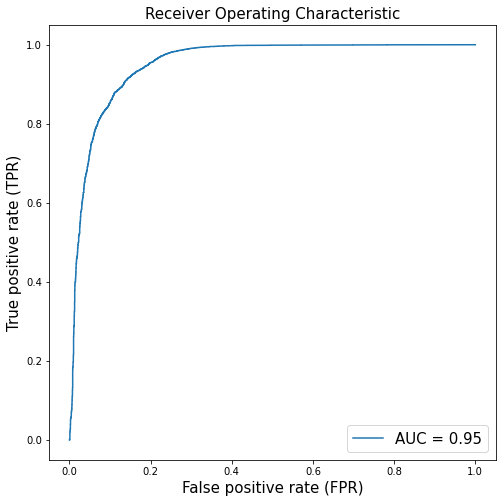

In [40]:
# make roc_auc plot
y_pred_proba = model.predict_proba(X_test)
calc_and_plot_roc(y_test, y_pred_proba[:,1])

In [41]:
#make a model GB
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
print_logisitc_metrics(y_test, y_pred)

# check confussion matrix 
M = confusion_matrix(y_test, y_pred)
print(M)

acc = 0.94 F1-score = 0.96
[[2620  557]
 [ 160 9159]]


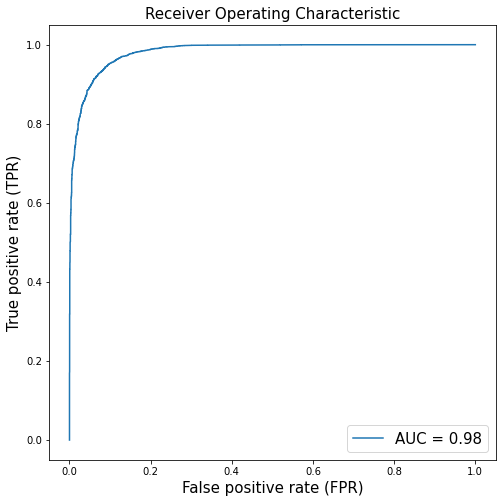

In [42]:
# make roc_auc plot
y_pred_proba = model.predict_proba(X_test)
calc_and_plot_roc(y_test, y_pred_proba[:,1])

In [43]:
#make a model SVC
from sklearn.svm import SVC

model = SVC().fit(X_train, y_train)
y_pred = model.predict(X_test)
print_logisitc_metrics(y_test, y_pred)

# check confussion matrix 
M = confusion_matrix(y_test, y_pred)
print(M)

acc = 0.92 F1-score = 0.95
[[2292  885]
 [  65 9254]]


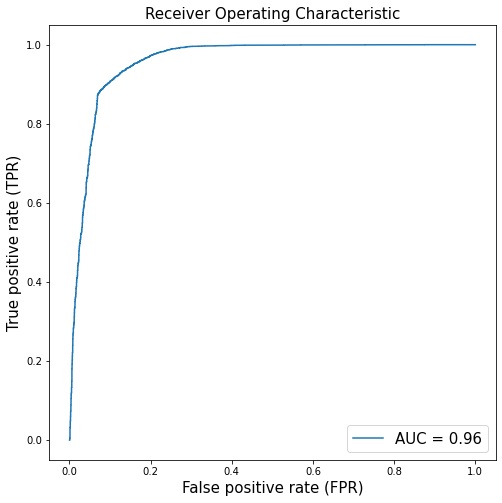

In [44]:
# make roc_auc plot
y_score = model.decision_function(X_test)
calc_and_plot_roc(y_test, y_score)

In [45]:
# find best params for Random forrest model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {'min_samples_split':range(2,10),
              'max_depth':range(2,10),
              'criterion':['gini', 'entropy']}

clf = RandomForestClassifier()
grid = GridSearchCV(clf, parameters, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)



{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 8}


In [49]:
#make a model RFC
from sklearn.ensemble import RandomForestClassifier

model =  RandomForestClassifier(criterion='gini', max_depth=9, min_samples_split=8, random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_test)
print_logisitc_metrics(y_test, y_pred)

# check confussion matrix 
M = confusion_matrix(y_test, y_pred)
print(M)

acc = 0.94 F1-score = 0.96
[[2515  662]
 [  96 9223]]


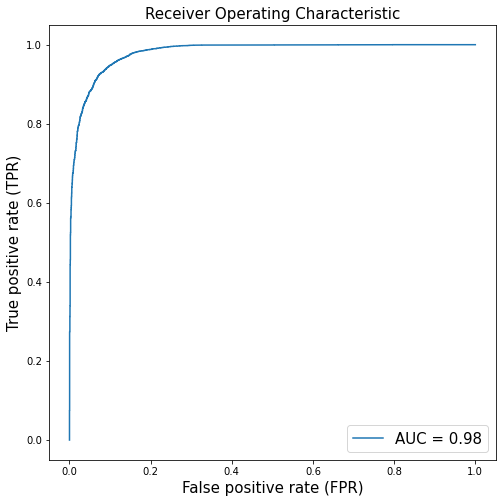

In [47]:
# make roc_auc plot
y_pred_proba = model.predict_proba(X_test)
calc_and_plot_roc(y_test, y_pred_proba[:,1])

## Вывод
Сравнив оценки значений ROC AUC лучметрики ше всего с  предсказанием справились модель RandomForest и GradientBoosting. AUC =0.98, однако, взглянув на FPR & FNR, делаем вывод что GradientBoosting предсказывает чуть лучше.